# Case Study : How Can a Wellness Technology Company Play It Smart?

## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

# Problem
Bellabeat company, needs to understand how consumers use non-Bellabeat fitness trackers to identify trends that can:

* Reveal opportunities to improve Bellabeat’s products (e.g., Leaf, Time, or Spring).

* Guide data-driven marketing strategies to attract new customers and retain existing ones.

# Business Task

**Analyze Fitbit user data (daily activity and sleep patterns) to:**

1. Identify trends in physical activity (steps, distance, intensity) and sleep quality.

2. Correlate activity levels with sleep metrics to uncover behavioral insights.

3. Provide actionable recommendations for Bellabeat’s marketing strategy, focusing on:

   - **Product Enhancement:** Adjust features of a selected Bellabeat product (e.g., Leaf tracker) based on usage gaps.

   - **Targeted Campaigns:** Highlight underutilized health metrics (e.g., sleep improvement, sedentary alerts) in ads.

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading necessary library

In [9]:
library(tidyverse)

# Load CSV file

* Create a dataframe named 'daily_activity' and read in one of the CSV files from the dataset.
* Remember, we can name our dataframe something different, and we can also save our CSV file under a different name as well.


In [11]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


In [12]:
# Create another dataframe for the sleep data.
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# Explore a few key tables

In [13]:
# Take a look at the daily_activity data.
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


In [14]:
# Identify all the columns in the daily_activity data.
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [15]:
# Take a look at the sleep_day data.
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [16]:
# Identify all the columns in the daily_activity data.
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Note that both datasets have the 'Id' field, this can be used to merge the datasets

## Understanding some summary statistics 

In [17]:
# How many unique participants are there in each dataframe?
# It looks like there may be more participants in the daily activity dataset
# than the sleep dataset.
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)

[1] 35

[1] 24

In [18]:
# How many observations are there in each dataframe?
nrow(daily_activity)
nrow(sleep_day)

[1] 457

[1] 413

What are some quick summary statistics we'd want to know about each data frame?

In [19]:
# For the daily activity dataframe:
daily_activity %>%
select(TotalSteps,
TotalDistance,
SedentaryMinutes) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  32.0  
 1st Qu.: 1988   1st Qu.: 1.410   1st Qu.: 728.0  
 Median : 5986   Median : 4.090   Median :1057.0  
 Mean   : 6547   Mean   : 4.664   Mean   : 995.3  
 3rd Qu.:10198   3rd Qu.: 7.160   3rd Qu.:1285.0  
 Max.   :28497   Max.   :27.530   Max.   :1440.0  

In [20]:
# For the sleep dataframe:
sleep_day %>%
select(TotalSleepRecords,
TotalMinutesAsleep,
TotalTimeInBed) %>%
summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

What does this tell us about how this sample of people's activities?

## Plotting a few explorations
- What's the relationship between steps taken in a day and sedentary minutes?
- How could this help inform the customer segments that we can market to?
- E.g. position this more as a way to get started in walking more?
- Or to measure steps that you're already taking?

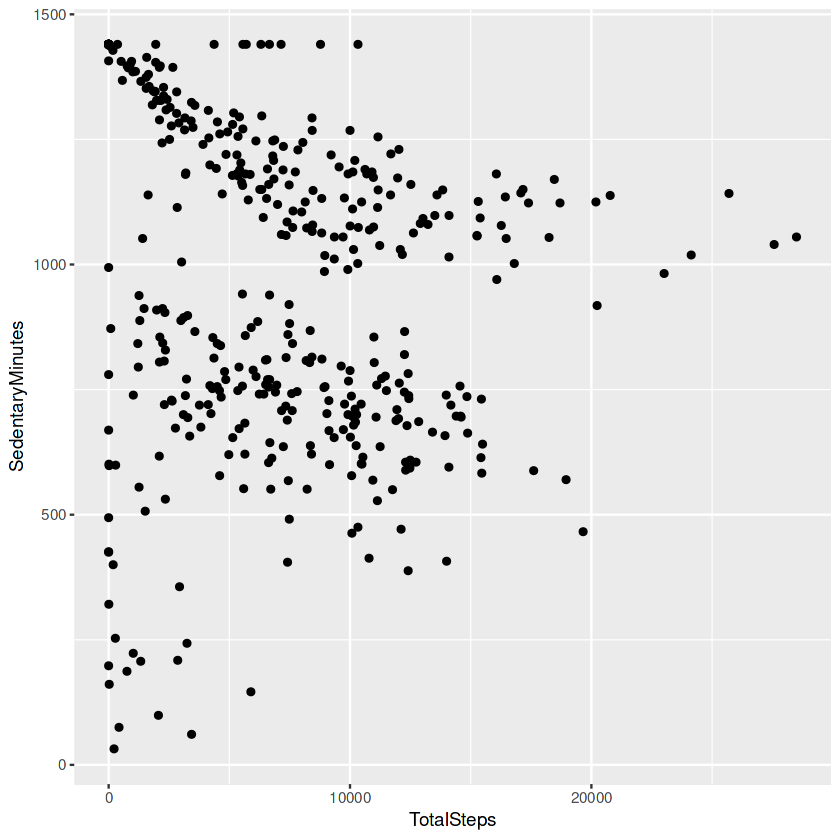

In [21]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + geom_point()

What's the relationship between minutes asleep and time in bed?
You might expect it to be almost completely linear - are there any unexpected trends?

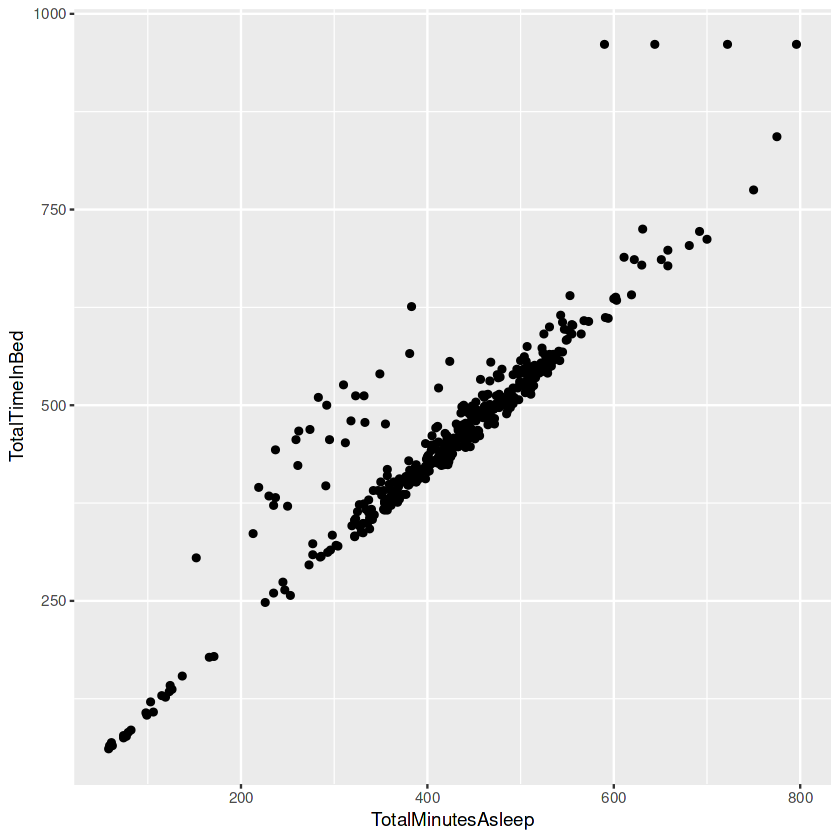

In [22]:
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point()

What could these trends tell us about how to help market this product? Or areas where we
might want to explore further?

## Merging these two datasets together

In [25]:
combined_data <- merge(sleep_day, daily_activity, by="Id")

# Take a look at how many participants are in this data set.
n_distinct(combined_data$Id)

[1] 24

In [ ]:
# Note that there were more participant Ids in the daily activity
# dataset that have been filtered out using merge. Consider using 'outer_join'
# to keep those in the dataset.
# Now you can explore some different relationships between activity and sleep as well.
# For example, do you think participants who sleep more also take more steps or fewer
# steps per day? Is there a relationship at all? How could these answers help inform
# the marketing strategy of how you position this new product?
# This is just one example of how to get started with this data - there are many other
# files and questions to explore as well!